# Assignment 3: ICP + Non-linear least squares optimization

* TEAM-ID: **25**  
* TEAM-NAME: **2fast2furious**  
* YOUR-ID:   **20171002**
* YOUR-NAME: **Soumyasis Gun**  

(Although you work in groups, both the students have to submit to Moodle, hence there's name field above)


## Instructions

* Please check Moodle for "TEAM-ID" and "TEAM-NAME" fields above. Some of your names have been edited because of redundancy/simplicity. Instructions for submitting the assignment through GitHub Classrooms/Moodle has been uploaded on Moodle. Any clarifications will be made there itself.
* Code must be written in Python in Jupyter Notebooks. You can use Assignment-1's environment for this assignment. More instructions for setup provided as you progress through this assignment.
* Both the team members must submit the zip file.
* You are not allowed to use any external libraries (other than ones being imported below).
* Answer the descriptive questions in your own words with context & clarity. Do not just copy-paste from some Wikipedia page. You will be evaluated accordingly.
* You could split the Jupyter Notebook cells where TODO is written, but please try to avoid splitting/changing the structure of other cells.

In [1]:
# Only allowed to use these libraries for this assignment. 
# Setup: Just activate Assignment-1's environment and install matplotlib `python -m pip install -U matplotlib`
import numpy as np
import math
import matplotlib.pyplot as plt
import time

# Question 1: Simple Non-Linear least squares for Gaussian function

First, go through the [solved example here](https://www.notion.so/saishubodh/From-linear-algebra-to-non-linear-weighted-least-squares-13cf17d318be4d45bb8577c4d3ea4a02#1de60a8465664d39a12af24353feef9e) from the [notes page](https://www.notion.so/saishubodh/Mobile-Robotics-2020-Students-Page-0b65a9c20edd4081978f4ffad917febb#a68cabac64754fa485144cc89b4b8c65). After understanding this, 

(1.1) Code it from scratch using `numpy` and try it out yourself for say different number of iterations with a certain tolerance for all 50 observations using Gradient Descent. Make the following plots using `matplotlib`:
   * Data and fit plot: Ground truth Gaussian, observations (points) & predicted Gaussian on the same plot.
   * Cost function ($\|r\|^2$) vs number of iterations   
   
Experiment with the hyperparameters and compile your observations in a table. Clearly mention your hyperparameters with justification.

(1.2) You've used Gradient Descent above. Now implement Gauss-Newton and LM algorithms. To contrast between the three, you must experiment with 
   * Different initial estimate: Can a particular algorithm handle if the initial estimate is too far from GT?
   * Different number of observations: Can a particular algorithm handle very less observations?
   * Add [noise](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html) to your observations: Can a particular algorithm handle large noise?
   * What else can you think of? (For example, can an algorithm converge in less iterations compared to others?)
    
Make the plots (mentioned in 1.1) for all 3 algorithms. Report your observations in a table(s) (comparison between the three for different factors). You will be awarded depending on how comprehensive your experimentation is (which you have to explain below under "**Answers for Question 1**" section).

## Code for Question 1

In [2]:
# Only numpy & matplotlib is sufficient for this question.
##############################################################################
# TODO: Do tasks described in Question 1                                     #
##############################################################################
# Replace "pass" statement with your code (You can split this cell into
# multiple cells if you wish to)

def DataLoader(a = 10, m = 0, s = 20,start = -25, end = 25, num_points = 100, noise = False):
    x = np.linspace(start,end,num_points)
    y = forward(x, [a,m,s])
    return x, y

def forward(x,params):
    pred = params[0]*np.exp(-((x-params[1])**2)/(2*(params[2]**2)))
    return pred
    
def GradientDescent(X, Y, lr = 1e-2, num_iter=500, threshold = 1e-15, params_init = False):
    '''
    Inputs
        X  = Data point
        Y  = Ground truth
        
    Outputs
        params[0] = a
        params[1] = m
        params[2] = s
        pred = values on function for guessed params
    '''
    if params_init is not False:
        params = params_init
    else:
        params = np.ones((3))
    old_params = params
    pred = 0.0
    grad = np.zeros((len(params)))
    cost = []
    for i in range(num_iter):
        for idx,(x,y) in enumerate(zip(X,Y)):
            pred = forward(x,params)
            grad[0] = pred/params[0]
            grad[1] = (x-params[1])/(params[2]**2)*pred
            grad[2] = grad[1]*(x-params[1])/(params[2])
            grad = 2*(pred-y)*grad
            params = params - lr*grad
        
        cost.append(np.sum((forward(X,params)-Y)**2))
        if threshold is not None:
            if np.sqrt(np.sum((params-old_params)**2)) > threshold:
#                 print('Params moved from a = ',old_params[0],', m = ', old_params[1], ', s = ', old_params[2],  ' to a = ',params[0],', m = ', params[1], ', s = ', params[2])
                old_params = params
            else:
                break
    
    print('Converged in ',str(i+1), ' iterations')
    return params, forward(X,params), np.array(cost)

In [3]:
def GaussNewton(X, Y, lr = 1e-2, num_iter=500, threshold = 1e-15, params_init = False):
    
    '''
    Inputs
        X  = Data point
        Y  = Ground truth
        
    Outputs
        params[0] = a
        params[1] = m
        params[2] = s
        pred = values on function for guessed params
    '''
    if params_init is not False:
        params = params_init
    else:
        params = np.ones((3))
    old_params = params
    pred = 0.0
    grad = np.zeros((len(params)))
    cost = []
    for i in range(num_iter):
        for idx,(x,y) in enumerate(zip(X,Y)):
            pred = forward(x,params)
            grad[0] = pred/params[0]
            grad[1] = (x-params[1])/(params[2]**2)*pred
            grad[2] = grad[1]*(x-params[1])/(params[2])
            grad = 2*(pred-y)*grad/(np.sqrt(np.sum(grad**2)))
            params = params - lr*grad
        
        cost.append(np.sum((forward(X,params)-Y)**2))
        if threshold is not None:
            if np.sqrt(np.sum((params-old_params)**2)) > threshold:
#                 print('Params moved from a = ',old_params[0],', m = ', old_params[1], ', s = ', old_params[2],  ' to a = ',params[0],', m = ', params[1], ', s = ', params[2])
                old_params = params
            else:
                break
    
    print('Converged in ',str(i+1), ' iterations')
    return params, forward(X,params), np.array(cost)

In [4]:
def LevenbergMarquardt(X, Y, Lambda = 1e-3, lr = 1e-2, num_iter=500, threshold = 1e-15, params_init = False):
    
    '''
    Inputs
        X  = Data point
        Y  = Ground truth
        
    Outputs
        params[0] = a
        params[1] = m
        params[2] = s
        pred = values on function for guessed params
    '''
    if params_init is not False:
        params = params_init
    else:
        params = np.ones((3))
    old_params = params
    pred = 0.0
    grad = np.zeros((len(params)))
    cost = []
    for i in range(num_iter):
        for idx,(x,y) in enumerate(zip(X,Y)):
            pred = forward(x,params)
            grad[0] = pred/params[0]
            grad[1] = (x-params[1])/(params[2]**2)*pred
            grad[2] = grad[1]*(x-params[1])/(params[2])
            grad = 2*(pred-y)*grad/(Lambda+np.sqrt(np.sum(grad**2)))
            params = params - lr*grad
            
        cost.append(np.sum((forward(X,params)-Y)**2))
        if threshold is not None:
            if np.sqrt(np.sum((params-old_params)**2)) > threshold:
#                 print('Params moved from a = ',old_params[0],', m = ', old_params[1], ', s = ', old_params[2],  ' to a = ',params[0],', m = ', params[1], ', s = ', params[2])
                old_params = params
            else:
                break
    
    print('Converged in ',str(i+1), ' iterations')
    return params, forward(X,params), np.array(cost)

In [5]:
def show_results(X,Y,pred,cost):
    fig = plt.figure(figsize = [30,8], dpi = 60)
    ax = fig.add_subplot(131)
    ax.plot(X,Y,'r')
    ax.set_title('Input Distribution')
    ax1 = fig.add_subplot(132)
    ax1.plot(X,pred,'blue')
    ax1.set_title('Pred Distribution')
    ax2 = fig.add_subplot(133)
    ax2.plot(np.linspace(0,len(cost),len(cost)),cost,'green')
    ax2.set_title('Cost vs Iterations')
    plt.show()
##############################################################################
#                             END OF YOUR CODE                               #
##############################################################################

### Q 1.1

BASELINE
Converged in  632  iterations
[GD] Predicted params =  [1.00000000e+01 9.49094947e-14 2.00000000e+01]


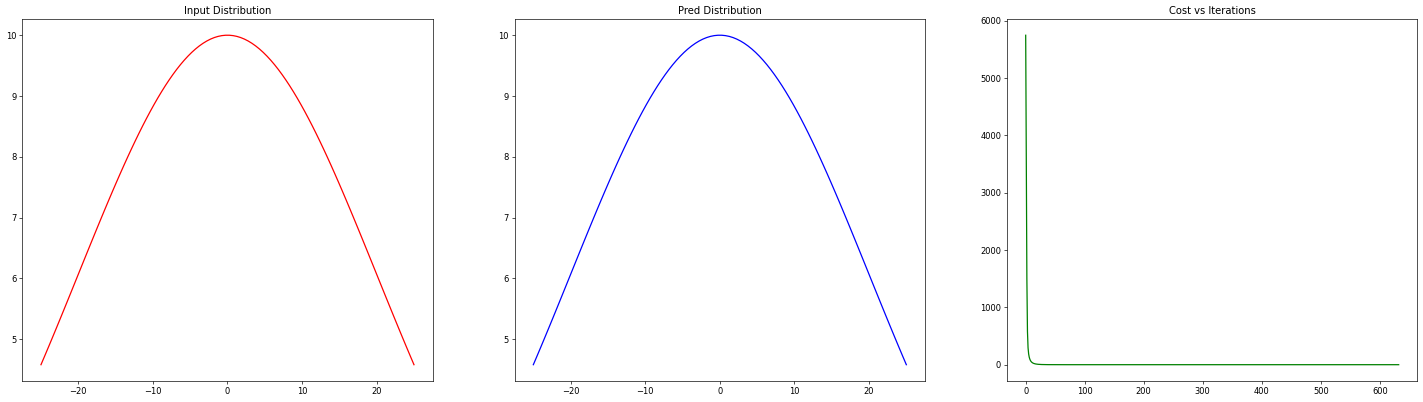

*******************************************************************************************
DECREASE LR
Converged in  52610  iterations
[GD] Predicted params =  [1.00000000e+01 1.34642664e-13 2.00000000e+01]


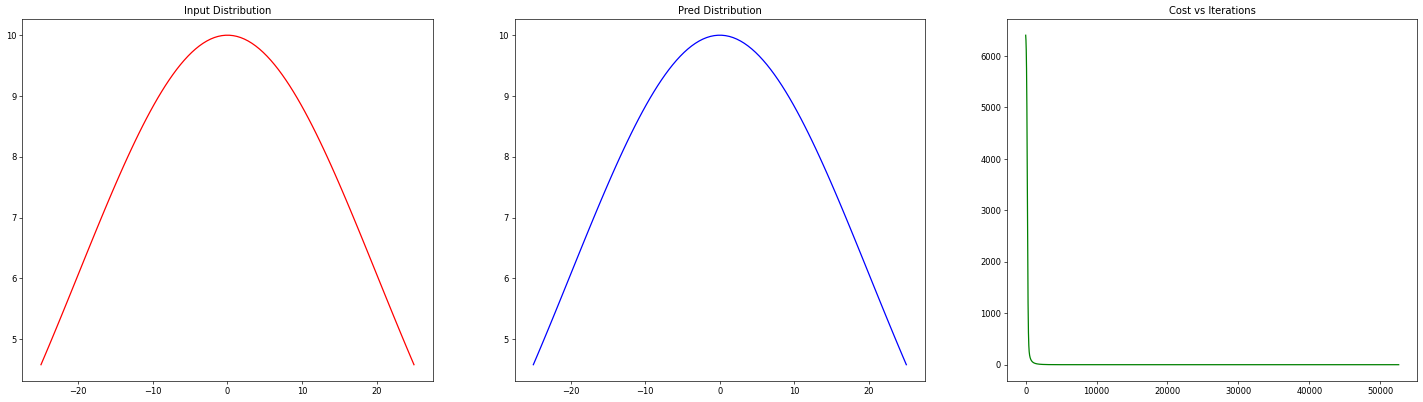

*******************************************************************************************
INCREASE LR
Converged in  134  iterations
[GD] Predicted params =  [ 1.00000000e+01 -2.66698935e-14  2.00000000e+01]


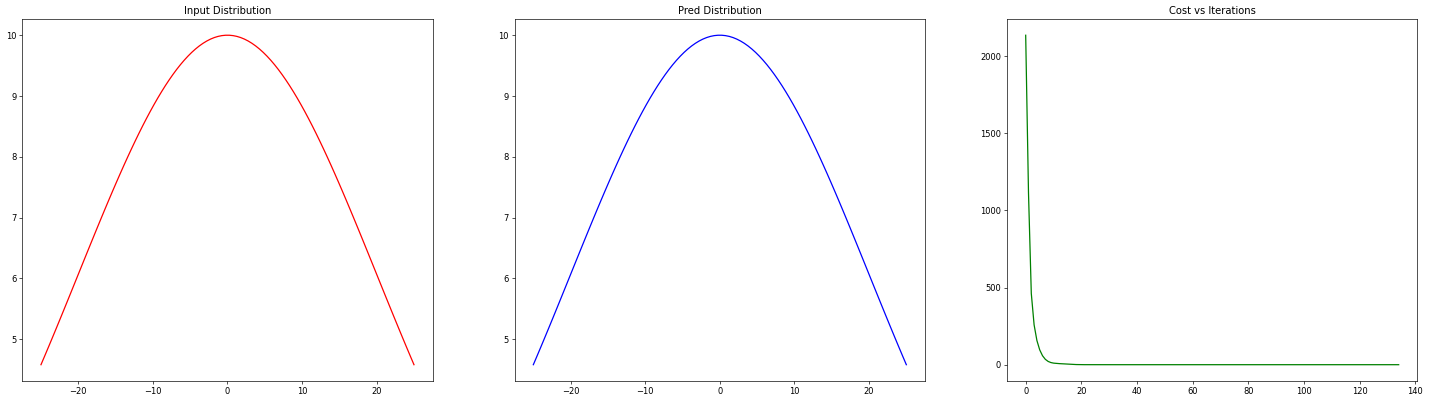

*******************************************************************************************
INCREASE Threshold
Converged in  349  iterations
[GD] Predicted params =  [1.00000000e+01 4.11074285e-08 1.99999998e+01]


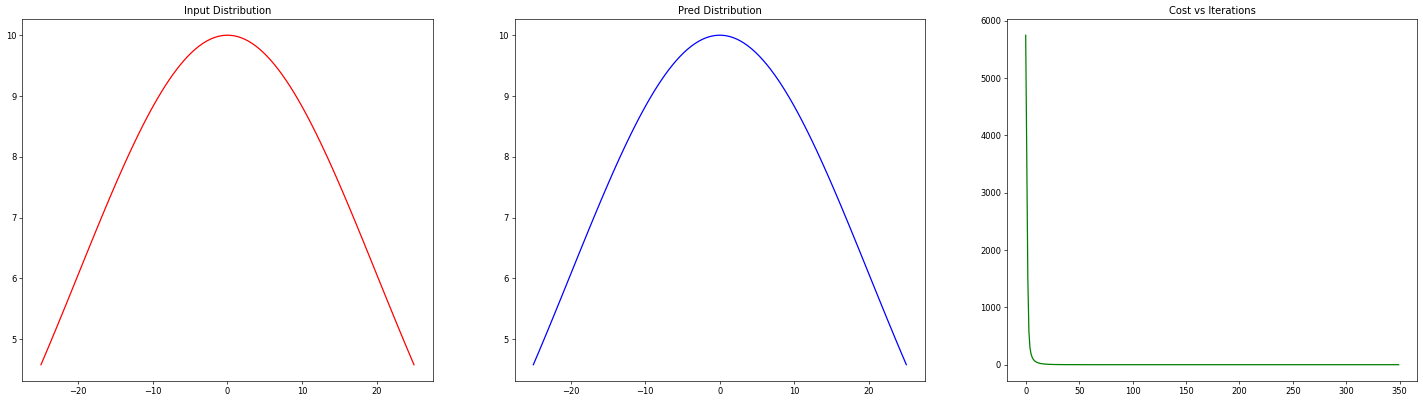

*******************************************************************************************
BASELINE Noise amplitude
Converged in  701  iterations
[GD] Predicted params =  [ 1.00624836e+01 -1.76109491e-02  2.03779436e+01]


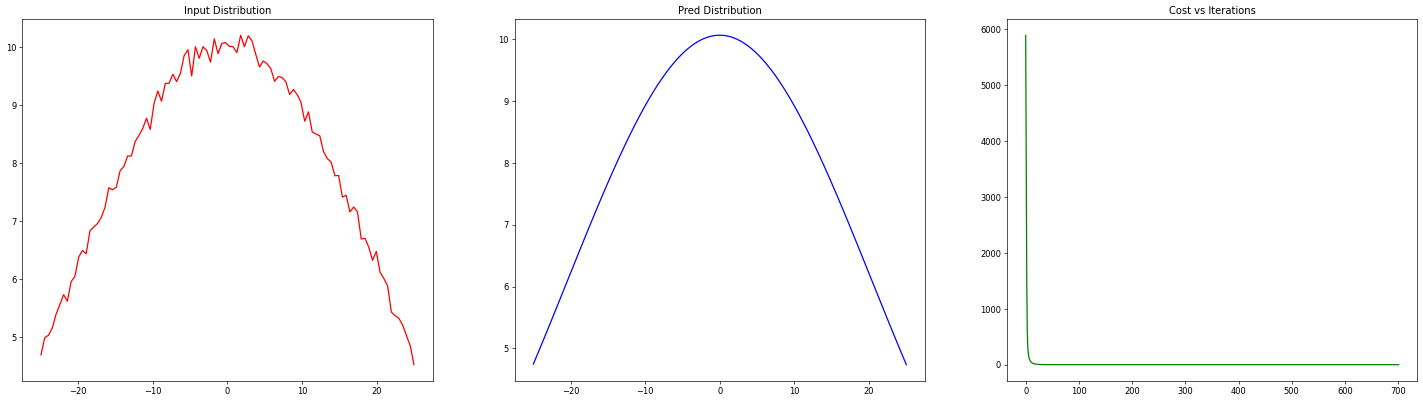

INCREASE Noise amplitude
Converged in  1335  iterations
[GD] Predicted params =  [10.65301638 -0.24330644 24.1669481 ]


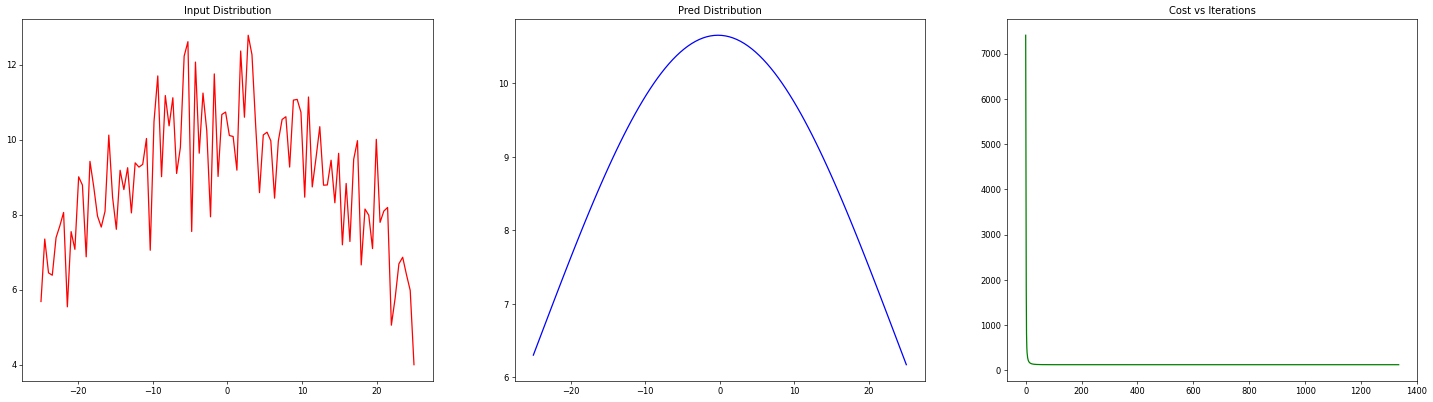

DECREASE Noise amplitude
Converged in  656  iterations
[GD] Predicted params =  [ 1.00062170e+01 -1.70126134e-03  2.00374687e+01]


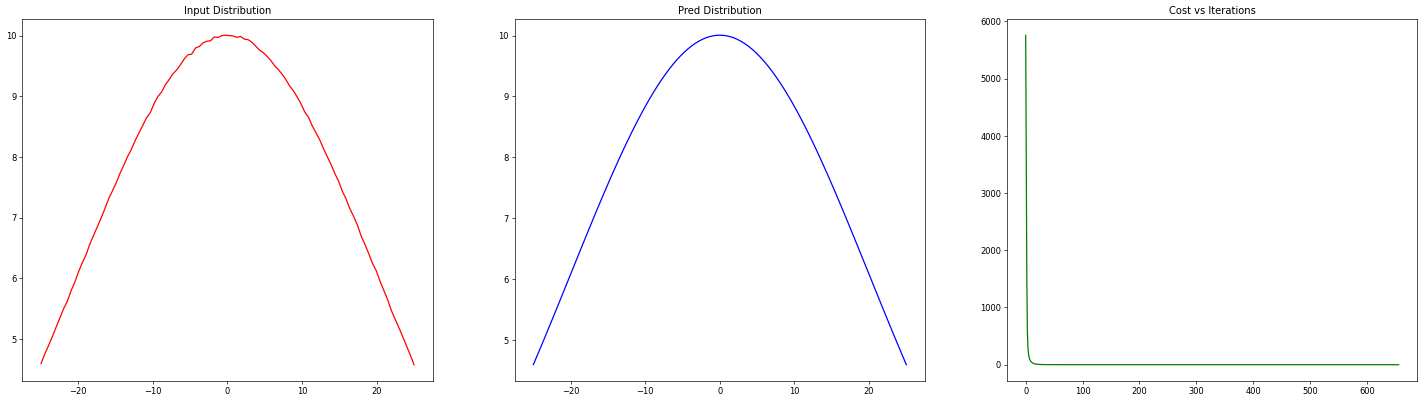

In [11]:
x, y = DataLoader()
print('BASELINE')
params_GD, pred_y_GD, cost_y_GD = GradientDescent(x,y,1e-2,100000,1e-15)
print('[GD] Predicted params = ',params_GD)
show_results(x,y,pred_y_GD,cost_y_GD)
print('*******************************************************************************************')

x, y = DataLoader()
print('DECREASE LR')
params_GD, pred_y_GD, cost_y_GD = GradientDescent(x,y,1e-4,100000,1e-15)
print('[GD] Predicted params = ',params_GD)
show_results(x,y,pred_y_GD,cost_y_GD)
print('*******************************************************************************************')

x, y = DataLoader()
print('INCREASE LR')
params_GD, pred_y_GD, cost_y_GD = GradientDescent(x,y,1e-1,100000,1e-15)
print('[GD] Predicted params = ',params_GD)
show_results(x,y,pred_y_GD,cost_y_GD)
print('*******************************************************************************************')

x, y = DataLoader()
print('INCREASE Threshold')
params_GD, pred_y_GD, cost_y_GD = GradientDescent(x,y,1e-2,100000,1e-8)
print('[GD] Predicted params = ',params_GD)
show_results(x,y,pred_y_GD,cost_y_GD)
print('*******************************************************************************************')

x, y = DataLoader()
print('BASELINE Noise amplitude')
noise_mu = 0.1
noise_sigma = 0.1
noise_amp = 1
noise = np.random.normal(noise_mu, noise_sigma, len(x))
y = y + noise_amp*noise
params_GD, pred_y_GD, cost_y_GD = GradientDescent(x,y,1e-2,10000,1e-15)
print('[GD] Predicted params = ',params_GD)
show_results(x,y,pred_y_GD,cost_y_GD)

x, y = DataLoader()
print('INCREASE Noise amplitude')
noise_mu = 0.1
noise_sigma = 0.1
noise_amp = 10
y = y + noise_amp*noise
params_GD, pred_y_GD, cost_y_GD = GradientDescent(x,y,1e-2,10000,1e-15)
print('[GD] Predicted params = ',params_GD)
show_results(x,y,pred_y_GD,cost_y_GD)

x, y = DataLoader()
print('DECREASE Noise amplitude')
noise_mu = 0.1
noise_sigma = 0.1
noise_amp = 0.1
y = y + noise_amp*noise
params_GD, pred_y_GD, cost_y_GD = GradientDescent(x,y,1e-2,10000,1e-15)
print('[GD] Predicted params = ',params_GD)
show_results(x,y,pred_y_GD,cost_y_GD)

### Q 1.2

In [8]:
x, y = DataLoader()
print('BASELINE')
params_GD, pred_y_GD, cost_y_GD = GradientDescent(x,y,1e-2,10000,1e-15)
print('[GD] Predicted params = ',params_GD)
# show_results(x,y,pred_y_GD)

params_GN, pred_y_GN, cost_y_GN = GaussNewton(x,y,1e-2,10000,1e-15)
print('[GN] Predicted params = ',params_GN)
# show_results(x,y,pred_y_GN)

params_LM, pred_y_LM, cost_y_LM = LevenbergMarquardt(x,y,1e-2,1e-2,10000,1e-15)
print('[LM] Predicted params = ',params_GN)
# show_results(x,y,pred_y_LM)
print('*******************************************************************************************')
print('Experiment - 1')
x1, y1 = DataLoader()
params_GD_expt1, pred_y_GD_expt1, cost_y_GD_expt1 = GradientDescent(x1,y1,1e-2,10000,1e-15,params_init = np.array([40,40,40]))
print('[GD] Predicted params = ',params_GD_expt1)
# show_results(x,y,pred_y_GD)

params_GN_expt1, pred_y_GN_expt1, cost_y_GN_expt1 = GaussNewton(x1,y1,1e-2,10000,1e-15,params_init = np.array([40,40,40]))
print('[GN] Predicted params = ',params_GN_expt1)
# show_results(x,y,pred_y_GN)

params_LM_expt1, pred_y_LM_expt1, cost_y_LM_expt1 = LevenbergMarquardt(x1,y1,1e-2,1e-2,10000,1e-15,params_init = np.array([40,40,40]))
print('[LM] Predicted params = ',params_GN_expt1)
print('*******************************************************************************************')
print('Experiment - 2')
x2, y2 = DataLoader(num_points = 20)
params_GD_expt2, pred_y_GD_expt2, cost_y_GD_expt2 = GradientDescent(x2,y2,1e-2,10000,1e-15)
print('[GD] Predicted params = ',params_GD_expt2)
# show_results(x,y,pred_y_GD)

params_GN_expt2, pred_y_GN_expt2, cost_y_GN_expt2 = GaussNewton(x2,y2,1e-2,10000,1e-15)
print('[GN] Predicted params = ',params_GN_expt2)
# show_results(x,y,pred_y_GN)

params_LM_expt2, pred_y_LM_expt2, cost_y_LM_expt2 = LevenbergMarquardt(x2,y2,1e-2,1e-2,10000,1e-15)
print('[LM] Predicted params = ',params_GN_expt2)
print('*******************************************************************************************')
print('Experiment - 3')
x3, y3 = DataLoader()
noise_mu = 0.1
noise_sigma = 0.1
noise_amp = 1
y3 = y3 + noise_amp*np.random.normal(noise_mu, noise_sigma, len(x3))
params_GD_expt3, pred_y_GD_expt3, cost_y_GD_expt3 = GradientDescent(x3,y3,1e-2,10000,1e-15)
print('[GD] Predicted params = ',params_GD_expt3)
# show_results(x,y,pred_y_GD)

params_GN_expt3, pred_y_GN_expt3, cost_y_GN_expt3 = GaussNewton(x3,y3,1e-2,10000,1e-15)
print('[GN] Predicted params = ',params_GN_expt3)
# show_results(x,y,pred_y_GN)

params_LM_expt3, pred_y_LM_expt3, cost_y_LM_expt3 = LevenbergMarquardt(x3,y3,1e-2,1e-2,10000,1e-15)
print('[LM] Predicted params = ',params_GN_expt3)

BASELINE
Converged in  632  iterations
[GD] Predicted params =  [1.00000000e+01 9.49094947e-14 2.00000000e+01]
Converged in  501  iterations
[GN] Predicted params =  [1.00000000e+01 7.76992337e-14 2.00000000e+01]
Converged in  507  iterations
[LM] Predicted params =  [1.00000000e+01 7.76992337e-14 2.00000000e+01]
*******************************************************************************************
Experiment - 1
Converged in  3903  iterations
[GD] Predicted params =  [ 1.00000000e+01 -9.41840655e-14  2.00000000e+01]
Converged in  3459  iterations
[GN] Predicted params =  [ 1.00000000e+01 -7.77526099e-14  2.00000000e+01]
Converged in  3490  iterations
[LM] Predicted params =  [ 1.00000000e+01 -7.77526099e-14  2.00000000e+01]
*******************************************************************************************
Experiment - 2
Converged in  2836  iterations
[GD] Predicted params =  [1.00000000e+01 3.18382487e-14 2.00000000e+01]
Converged in  2213  iterations
[GN] Predicted para

BASELINE
GD


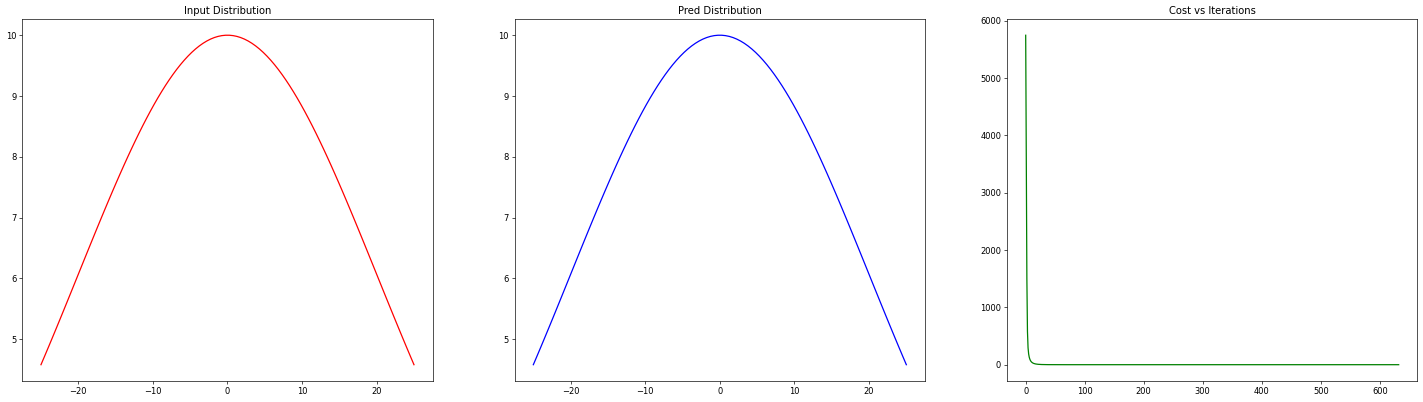

GN


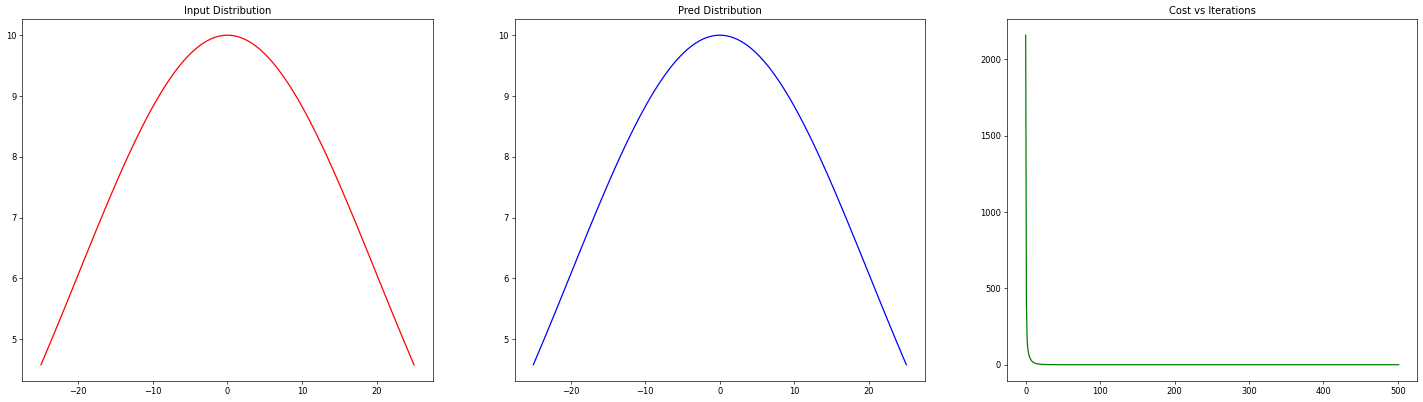

LM


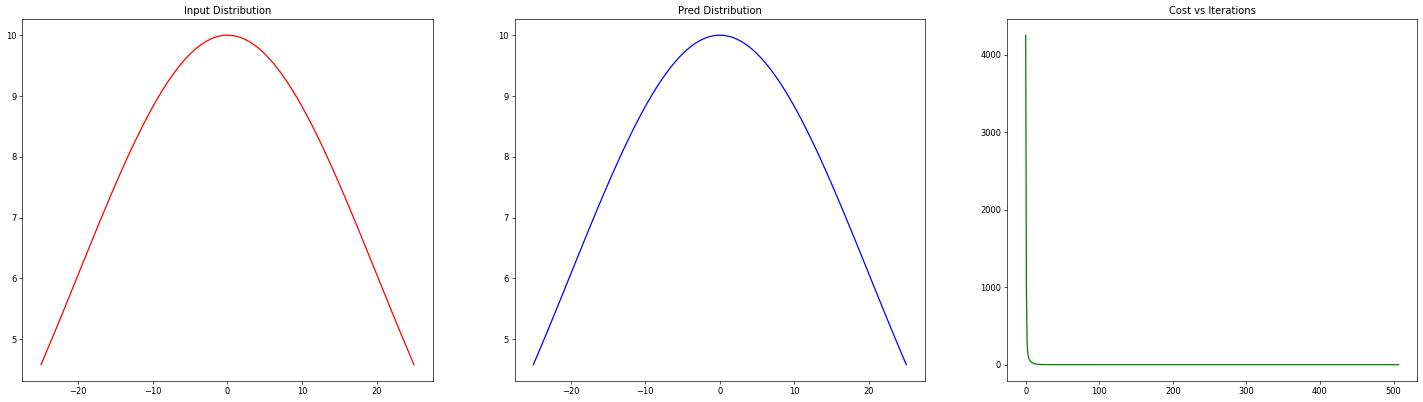

*******************************************************************************************
Expt 1
GD


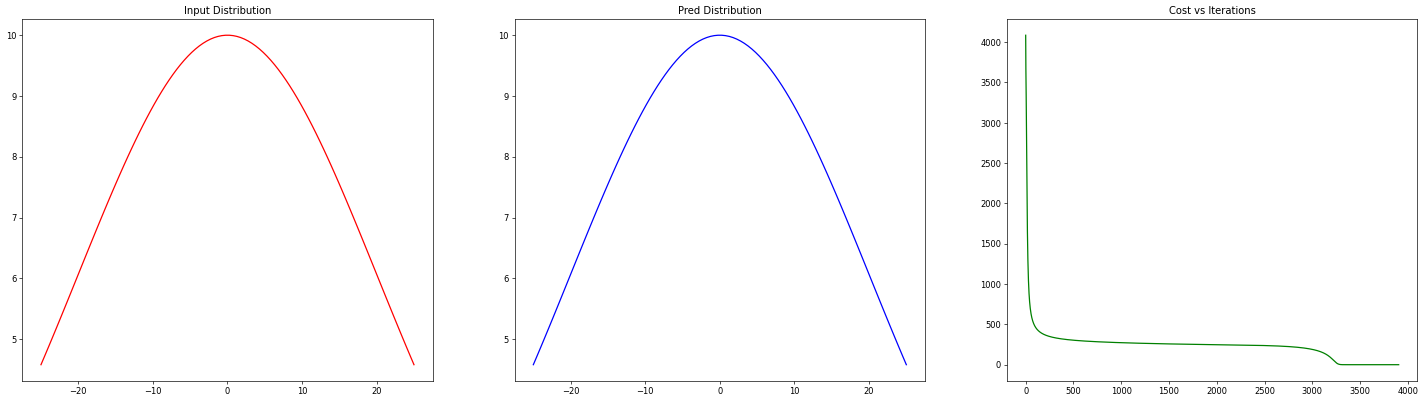

GN


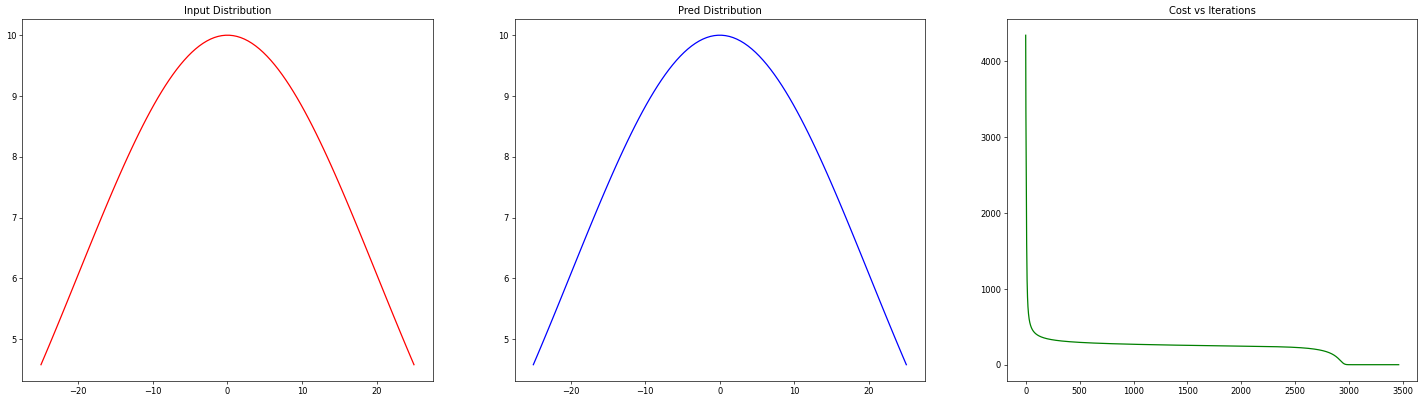

LM


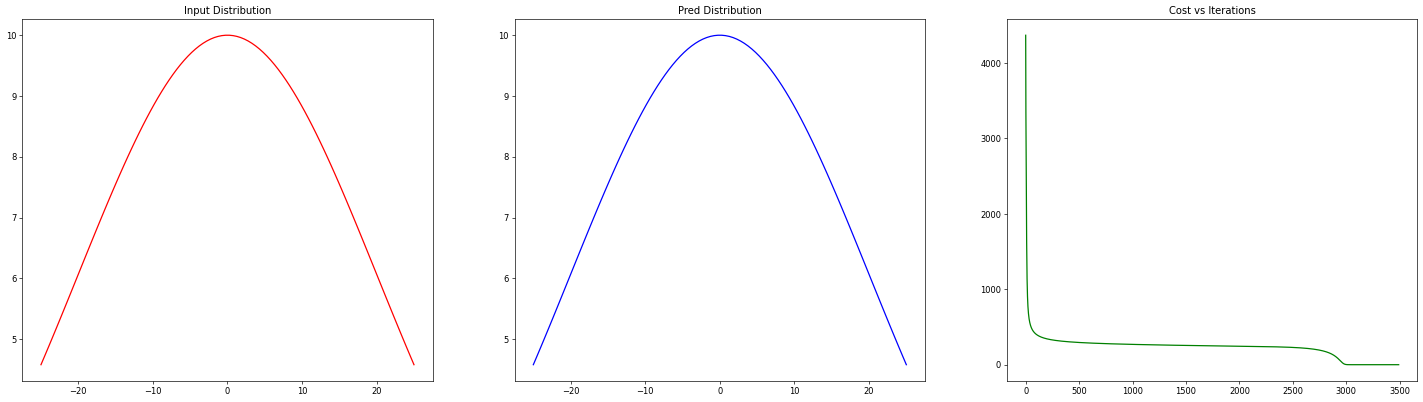

*******************************************************************************************
Expt 2
GD


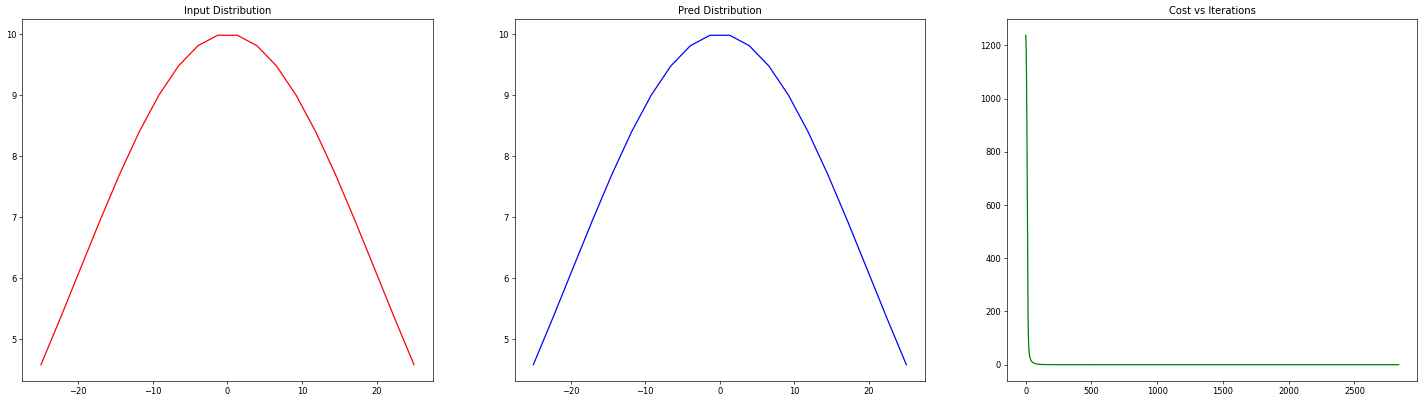

GN


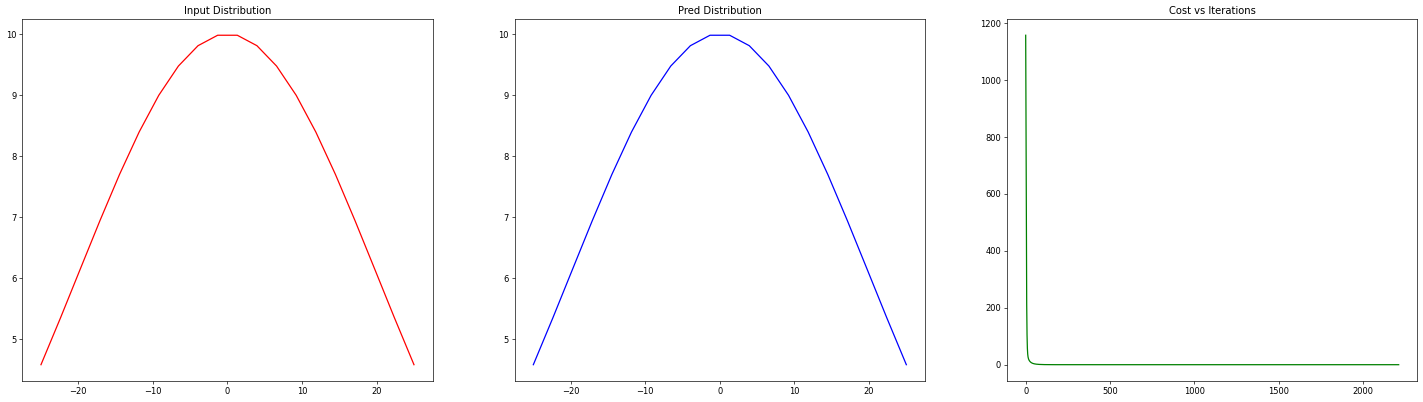

LM


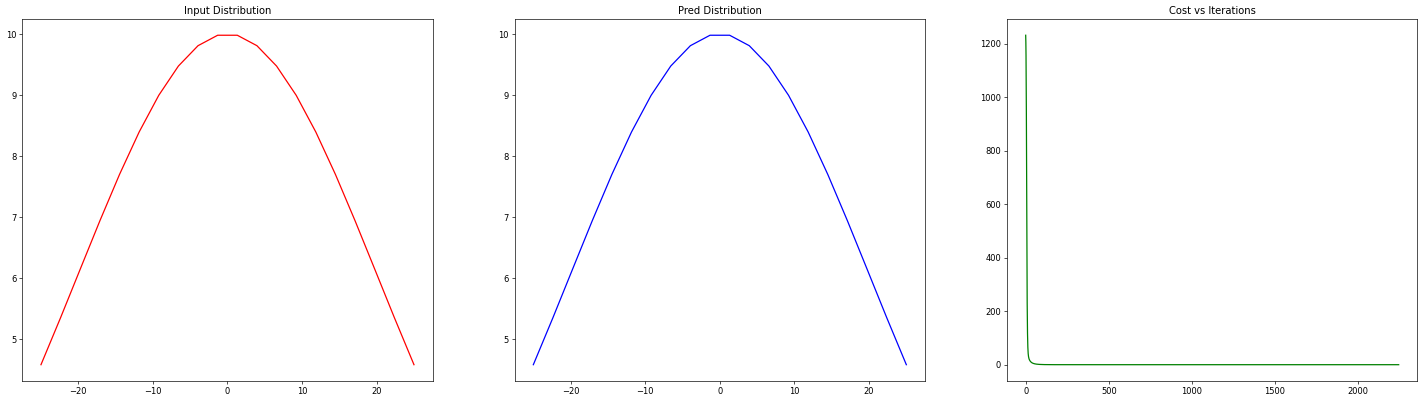

*******************************************************************************************
Expt 3
GD


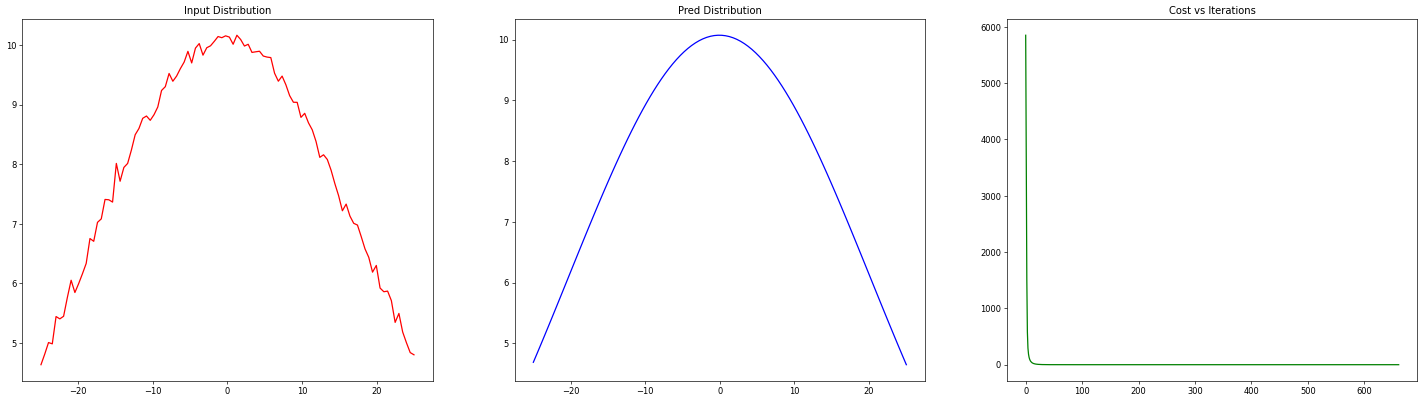

GN


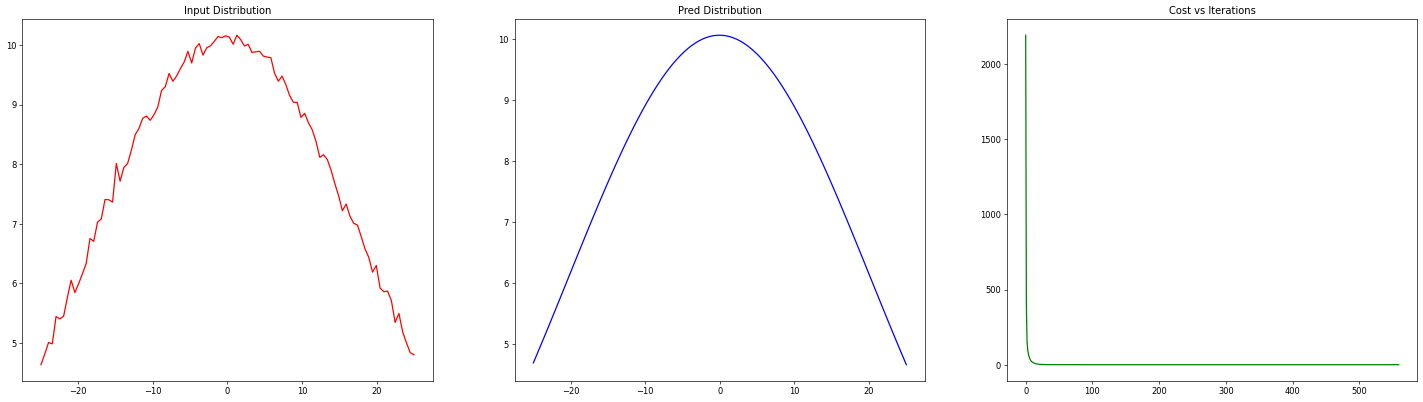

LM


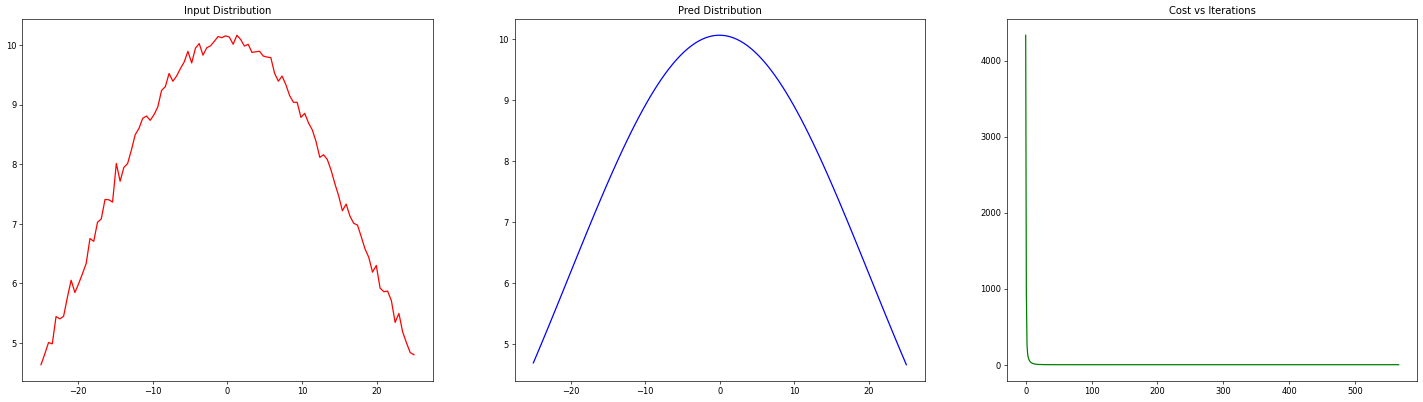

*******************************************************************************************


In [10]:
## Define the plots inside a function above and call them in this cell one by one. When I run this cell, all plots
## asked in Q1 should be generated. 
##############################################################################
# TODO: Plotting for Question 1    #
print('BASELINE')
print('GD')
show_results(x,y,pred_y_GD,cost_y_GD)
print('GN')
show_results(x,y,pred_y_GN,cost_y_GN)
print('LM')
show_results(x,y,pred_y_LM,cost_y_LM)
print('*******************************************************************************************')
print('Expt 1')
print('GD')
show_results(x1,y1,pred_y_GD_expt1,cost_y_GD_expt1)
print('GN')
show_results(x1,y1,pred_y_GN_expt1,cost_y_GN_expt1)
print('LM')
show_results(x1,y1,pred_y_LM_expt1,cost_y_LM_expt1)
print('*******************************************************************************************')
print('Expt 2')
print('GD')
show_results(x2,y2,pred_y_GD_expt2,cost_y_GD_expt2)
print('GN')
show_results(x2,y2,pred_y_GN_expt2,cost_y_GN_expt2)
print('LM')
show_results(x2,y2,pred_y_LM_expt2,cost_y_LM_expt2)
print('*******************************************************************************************')
print('Expt 3')
print('GD')
show_results(x3,y3,pred_y_GD_expt3,cost_y_GD_expt3)
print('GN')
show_results(x3,y3,pred_y_GN_expt3,cost_y_GN_expt3)
print('LM')
show_results(x3,y3,pred_y_LM_expt3,cost_y_LM_expt3)
print('*******************************************************************************************')

##############################################################################
#                             END OF YOUR CODE                               #
##############################################################################

## Answers for Question 1
Add explanations for the answers along with tables here.
### Answer for 1.1
Explain your experimentations with justification here

**No. of Iterations**

| Hyperparameters          | Baseline            | Increase  |Decrease   |
| ------------- |:-------------:| -------:|-------:|
| LR      | 632      | 134|52610|
| Noise Amplitude      | 701      | 1335|656|
| Threshold      | 632     | 349|-|

**Predictions [A,M,S]**

| Hyperparameters          | Baseline            | Increase  |Decrease   |
| ------------- |:-------------:| -------:|-------:|
| LR      | [1.00000000e+01 9.49094947e-14 2.00000000e+01]      | [ 1.00000000e+01 -2.66698935e-14  2.00000000e+01]| [1.00000000e+01 1.34642664e-13 2.00000000e+01]|
| Noise Amplitude      | [ 1.00624836e+01 -1.76109491e-02  2.03779436e+01]      | [10.65301638 -0.24330644 24.1669481 ]|[ 1.00062170e+01 -1.70126134e-03  2.00374687e+01]|
| Threshold      | [1.00000000e+01 9.49094947e-14 2.00000000e+01]     | [1.00000000e+01 4.11074285e-08 1.99999998e+01]|-|

<!-- BASELINE
Converged in  632  iterations
[GD] Predicted params =  [1.00000000e+01 9.49094947e-14 2.00000000e+01]

DECREASE LR
Converged in  52610  iterations
[GD] Predicted params =  [1.00000000e+01 1.34642664e-13 2.00000000e+01]

INCREASE LR
Converged in  134  iterations
[GD] Predicted params =  [ 1.00000000e+01 -2.66698935e-14  2.00000000e+01]

*******************************************************************************************
BASELINE Noise amplitude
Converged in  701  iterations
[GD] Predicted params =  [ 1.00624836e+01 -1.76109491e-02  2.03779436e+01]

INCREASE Noise amplitude
Converged in  1335  iterations
[GD] Predicted params =  [10.65301638 -0.24330644 24.1669481 ]


DECREASE Noise amplitude
Converged in  656  iterations
[GD] Predicted params =  [ 1.00062170e+01 -1.70126134e-03  2.00374687e+01]

*******************************************************************************************
INCREASE Threshold
Converged in  349  iterations
[GD] Predicted params =  [1.00000000e+01 4.11074285e-08 1.99999998e+01]
 -->
 
**Observations:**

* Gradient Descent converges in no of iterations inversely proportional to learning rate.
* Gradient Descent is a heuristically driven algorithm, so the amplitude of noise added to the data makes a difference in the predictions, rate of convergence and consequently the loss values.

### Answer for 1.2
Explain your experimentations with justification here

**No. of Iterations for Baseline**

| Algorithm          | Value            |
| ------------- |:-------------:|
| Gradient Descent      | 632      |
| Gauss Newton      | 501      |
| Levinberg Marquardt      | 507      |

**No. of Iterations for Far away Initialisation**

| Algorithm          | Value            |
| ------------- |:-------------:|
| Gradient Descent      | 3903      |
| Gauss Newton      | 3459      |
| Levinberg Marquardt      | 3490      |

**No. of Iterations for Reduced Points**

| Algorithm          | Value            |
| ------------- |:-------------:|
| Gradient Descent      | 2836      |
| Gauss Newton      | 2213      |
| Levinberg Marquardt      | 2245      |

**No. of Iterations for Noisy Data**

| Algorithm          | Value            |
| ------------- |:-------------:|
| Gradient Descent      | 661      |
| Gauss Newton      | 559      |
| Levinberg Marquardt      | 566      |

**Predictions for Baseline**

| Algorithm          | **A**            | **M**  | **S**   |
| ------------- |:-------------:| -------:|-------:|
| Gradient Descent      | 1e+01      | 9.491e-14|2e+01|
| Gauss Newton      | 1e+01      | 7.77e-14|2e+01|
| Levinberg Marquardt      | 1e+01      | 7.77e-14|2e+01|

**Observations :**

* Gradient Descent has no normalisation on the gradient, however Gauss - Newton and Levenberg Marquardt methods have a normalisation proportional to the gradient magnitude. This ensures that very large gradients are normalised such that they do not cause oscillations and very small gradients are boosted for updates. This is similar to using momentum for gradient descent, because it ensures faster convergence which is validated by number of iterations.
* Predictions made by Gauss Newton and Levinberg Marquardt methods will be better compared to Gradient Descent as the gradient approximation involves linearly approximated second order terms, however Vanilla Gradient Descent uses first order approximations, which is proven by the predictions table.
* When we make an initialisation far away, the convergence is slower and usually involves some sudden drops in the cost versus iteration maps because since we are approximating an exponential function, over a distance the closeness of predictions and ground-truth increase rapidly, initially and then decrease, as is proven by the cost-vs-iteration in Experiment-1.
* Noisy samples have almost no effect on rate of convergence but it does have on the cost value and subsequently the predictions obtained, which are little off from the ground truth values.
* Gauss Newton has a normalisation of magnitude of gradient, whereas Levinberg Marquardt has a normalisation of ($\lambda$ + magnitude of gradient). Since $\lambda$ is a heuristic parameter empirically chosen to minimise error, it could well be the case that sume case it wrongly boosts or suppresses gradients, leading to longer time of convergence. 
* Hence the speed of convergence of the algorithms are in the order : **Gauss-Newton > Levinberg Marquardt > Vanilla Gradient Descent**.
* The claims can be validated from the plots provided.

# Question 2: ICP Coding
Implement basic ICP algorithm with (given) known correspondences. 

Let X be your point cloud observed from the initial position. Your robot moved and observed P1 as your current point cloud. Same with P2 under a different transformation. Now you wish to apply ICP to recover transformation between (X & P1) and (X & P2). Use *root mean squared error (rmse)* as the error metric.

In [8]:
# HELPER FUNCTIONS: DON'T EDIT THIS BLOCK - If you want to test on more cases, you can add code to this block but
# DON'T delete existing code.


# Visualizing ICP registration
def plot_icp(X, P, P0, i, rmse):
    plt.cla()
    plt.scatter(X[0,:], X[1,:], c='k', marker='o', s=50, lw=0)
    plt.scatter(P[0,:], P[1,:], c='r', marker='o', s=50, lw=0)
    plt.scatter(P0[0,:], P0[1,:], c='b', marker='o', s=50, lw=0)
    plt.legend(('X', 'P', 'P0'), loc='lower left')
    plt.plot(np.vstack((X[0,:], P[0,:])), np.vstack((X[1,:], P[1,:])) ,c='k')
    plt.title("Iteration: " + str(i) + "  RMSE: " + str(rmse))
    plt.axis([-10, 15, -10, 15])
    plt.gca().set_aspect('equal', adjustable='box')
    plt.draw()
    plt.pause(2)
    return

# Generating data for our simple ICP
def generate_data():
  
  # create reference data  
    X = np.array([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 9, 9, 9, 9, 9, 9],
            [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,-1,-2,-3,-4,-5]])

    # add noise
    P = X + 0.05 * np.random.normal(0, 1, X.shape)

    # translate
    P[0,:] = P[0,:] + 1
    P[1,:] = P[1,:] + 1

    # rotate
    theta1 = ( 10.0 / 360) * 2 * np.pi
    theta2 = (110.0 / 360) * 2 * np.pi
    rot1 = np.array([[math.cos(theta1), -math.sin(theta1)],
               [math.sin(theta1),  math.cos(theta1)]])
    rot2 = np.array([[math.cos(theta2), -math.sin(theta2)],
               [math.sin(theta2),  math.cos(theta2)]])

    # sets with known correspondences
    P1 = np.dot(rot1, P)
    P2 = np.dot(rot2, P)

    return X, P1, P2

In [38]:
# TODO: Do tasks described in Q2                                             #
##############################################################################
# Replace "pass" statement with your code

# TODO1: Get data X, P1, P2 from helper function generate_data(). 
X, P1, P2 = generate_data()

def rmse(X,P):
    return np.sqrt(np.mean((np.linalg.norm(X-P,axis=0))**2))
def icp(X,P,mean_X,mean_P):
    W = np.matmul(X,P.T)
    U,S,V = np.linalg.svd(W)
    R = np.matmul(U,V.T)
#     print(R.shape)
    T = mean_X - np.matmul(R,mean_P)
    return R, T
        
# TODO2: Apply ICP between X and P_i. (in our case,(X & P1) and (X & P2))
def ICP(X, P):
    num_iter = 5 #Experiment & check if your theoretical understanding is correct.
    P0 = P #Initialization
    
    mean_X,mean_P = np.mean(X,axis=1),np.mean(P,axis=1)
    mu_X, mu_P = np.ones(X.shape), np.ones(P.shape)
    mu_X[0,:] = mean_X[0]
    mu_P[0,:] = mean_P[0]
    mu_X[1,:] = mean_X[1]
    mu_P[1,:] = mean_P[1]
    X = X - mu_X
    P = P - mu_P
    
    for i in range(num_iter):
        # implementing ICP:
        
        rmse_err = rmse(X,P)
        plot_icp(X, P, P0, i+1, rmse_err)
        print('RMSE Error at iteration #',str(i+1),' = ',rmse_err)
        mean_X,mean_P = np.mean(X,axis=1),np.mean(P,axis=1)
        mu_X, mu_P = np.ones(X.shape), np.ones(P.shape)
        mu_X[0,:] = mean_X[0]
        mu_P[0,:] = mean_P[0]
        mu_X[1,:] = mean_X[1]
        mu_P[1,:] = mean_P[1]
        R,T = icp(X,P, mu_X, mu_P)
        P = np.dot(R,P)+T
        
#         
        # TODO2.1: what's current error?
        # TODO2.2: call visualization helper function plot_icp.
        # TODO2.3: Implement ICP to get R, t
#         pass
        #P = np.dot(R, P) + t #Uncomment this: transforming my current point cloud towards initial point cloud

    return
##############################################################################
#                             END OF YOUR CODE                               #
##############################################################################

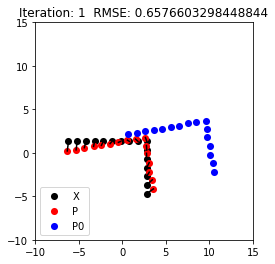

RMSE Error at iteration # 1  =  0.6576603298448844


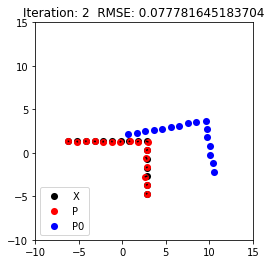

RMSE Error at iteration # 2  =  0.077781645183704


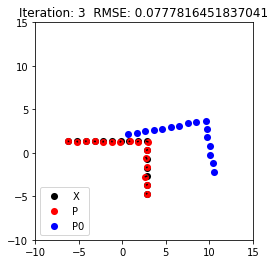

RMSE Error at iteration # 3  =  0.0777816451837041


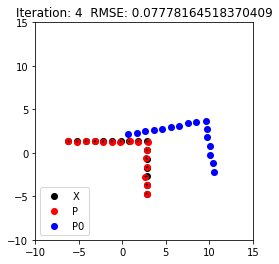

RMSE Error at iteration # 4  =  0.07778164518370409


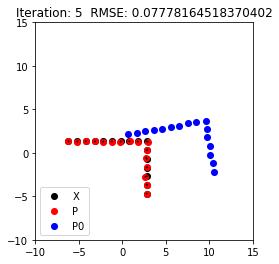

RMSE Error at iteration # 5  =  0.07778164518370402


In [39]:
# Call ICP on P1 & P2

ICP(X,P1) #Uncomment this
#

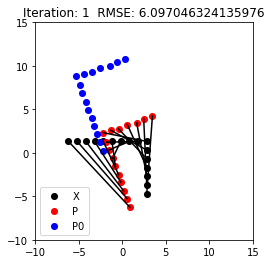

RMSE Error at iteration # 1  =  6.097046324135976


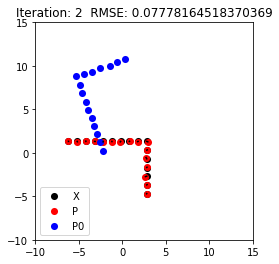

RMSE Error at iteration # 2  =  0.07778164518370369


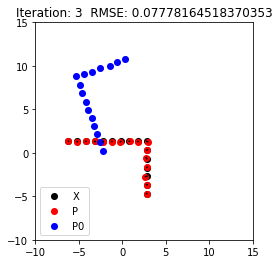

RMSE Error at iteration # 3  =  0.07778164518370353


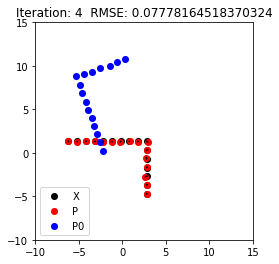

RMSE Error at iteration # 4  =  0.07778164518370324


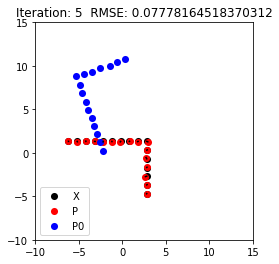

RMSE Error at iteration # 5  =  0.07778164518370312


In [40]:
ICP(X,P2)